In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import numpy as np
import pandas as pd

def imscatter(x, y, image, ax=None, zoom=1, show_by_thumnail=False, title='webtoon'):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)

    # Convert inputs to arrays with at least one dimension.
    x, y = np.atleast_1d(x, y)
    
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        

        # if show_by_thumnail:
        #     offsetbox = TextArea("", minimumdescent=False)
        #     ac = AnnotationBbox(offsetbox, (x0, y0),
        #               xybox=(20, -40),
        #               xycoords='data',
        #               boxcoords="offset points")
        #     artists.append(ax.add_artist(ac))
        artists.append(ax.add_artist(ab))

    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


In [2]:
vec_mean_df = pd.read_csv("C:/Users/조영찬/Desktop/기업 프로젝트 자료/vec_mean_20230209.csv", encoding='ansi')

In [4]:
vec_mean_df

,Unnamed: 0,Unnamed: 0.1,WebToonTitle,Xmean,Ymean,wt_num,cnt
0,0,0,1초,-6261.138021,-2828.377197,330,3
1,1,1,1학년 9반,-22501.961914,11747.643066,284,2
2,2,2,35cm,44756.115234,1858.772461,299,8
3,3,3,66666년 만에 환생한 흑마법사,45008.316406,75949.906250,170,2
4,4,4,6월의 라벤더,121476.821875,-80162.921875,553,5
...,...,...,...,...,...,...,...
543,543,543,회귀한 천재 헌터의 슬기로운 청소생활,-28230.518229,72171.403646,253,3
544,544,544,후궁 스캔들,-4452.032812,10109.828125,512,5
545,545,545,후덜덜덜 남극전자,-54567.300781,-31772.352865,362,3
546,546,546,흑막 여주가 날 새엄마로 만들려고 해,12790.371094,17166.779297,269,2


In [8]:
all_file_idx_to_class = {0: '108명의 그녀들', 1: '1331', 2: '1초', 3: '1학년 9반', 4: '35cm', 5: '66666년 만에 환생한 흑마법사', 6: '6월의 라벤더', 7: '7FATES_ CHAKHO', 8: '99강화나무몽둥이', 9: 'AI 유하', 10: 'A_I_ 닥터', 11: 'DARK MOON_ 달의 제단', 12: 'DARK MOON_ 회색 도시', 13: 'THE 런웨이', 14: '가비지타임', 15: '가족같은 XX', 16: '가짜 동맹', 17: '간 떨어지는 출근', 18: '간첩 18세', 19: '강남의 기사', 20: '개를 낳았다', 21: '개와 사람의 시간', 22: '거래하실래요_', 23: '게임 최강 트롤러', 24: '겨울 정원의 하와르', 25: '겨울특강', 26: '격기3반', 27: '견우와 선녀', 28: '결혼공략', 29: '결혼까지 망상했어_', 30: '결혼생활 그림일기', 31: '경비실에서 안내방송 드립니다', 32: '경자 전성시대', 33: '고교흥신소', 34: '고백 취소도 되나_', 35: '고삼무쌍', 36: '고양이 타타', 37: '공유몽', 38: '광해의 연인', 39: '괴물공작의 딸', 40: '교환학생', 41: '국세청 망나니', 42: '굿바이 유교보이', 43: '굿헌팅', 44: '권리행사자', 45: '궤도의 아이들', 46: '궤짝', 47: '규격 외 혈통 천재', 48: '그 남자의 은밀한 하루', 49: '그 남주와 이별하는 방법', 50: '그 황제가 시곗바늘을 되돌린 사연', 51: '그냥 선생님', 52: '그녀석 정복기', 53: '그렇고 그런 바람에', 54: '그림자 잡기', 55: '그림자의 밤', 56: '급식러너', 57: '급식아빠', 58: '기억해줘', 59: '김부장', 60: '꼬리잡기', 61: '꽃만 키우는데 너무강함', 62: '꿈의 기업', 63: '나 혼자 네크로맨서', 64: '나 혼자 만렙 뉴비', 65: '나 혼자 특성빨로 무한 성장', 66: '나노마신', 67: '나랑X할래_', 68: '나를 바꿔줘', 69: '나만의 고막남친', 70: '나쁜 마법사의 꿈', 71: '나쁜사람', 72: '나의 계절', 73: '나의 불편한 상사', 74: '나의 작은 서점', 75: '나이트런', 76: '나타나주세요_', 77: '나태 공자_ 노력 천재 되다', 78: '낙원의 이론', 79: '낙향문사전', 80: '남편 먹는 여자', 81: '남편을 만렙으로 키우려 합니다', 82: '내 남편과 결혼해줘', 83: '내가 죽기로 결심한 것은', 84: '내가 키운 S급들', 85: '내게 필요한 NO맨스', 86: '내겐 너무 소란한 결혼', 87: '내곁엔 없을까', 88: '내남친 킹카만들기', 89: '내일', 90: '너를 돌려차는 방법', 91: '너에게 입덕중', 92: '너의 미소가 함정', 93: '너의 순정_ 나의 순정', 94: '너의 키스씬', 95: '널 사랑하는 죽은 형', 96: '네 것이었던 것', 97: '네가 죽기를 바랄 때가 있었다', 98: '넷시의 비밀', 99: '노답소녀', 100: '노량진 공격대', 101: '노빠꾸 최하영', 102: '놓지마 정신줄 시즌3', 103: '누나_ 나 무서워', 104: '늑대처럼 홀로', 105: '다비_ 아찔하게 흐르는', 106: '다시쓰는 연애사', 107: '달의 요람', 108: '달이 사라진 밤', 109: '달이 없는 나라', 110: '대공님_ 실수였어요_', 111: '대신 심부름을 해다오', 112: '대위님_ 이번 전쟁터는 이곳인가요_', 113: '대충 캠퍼스로맨스임', 114: '대학원 탈출일지', 115: '더 게이머', 116: '더 해머', 117: '더블클릭', 118: '던전 씹어먹는 아티팩트', 119: '데드퀸', 120: '데빌샷', 121: '덴큐', 122: '도깨비 부른다', 123: '도사 가온', 124: '도전_ 집콕취미', 125: '독거미', 126: '돌&아이', 127: '돌아온 여기사', 128: '두 번 사는 프로듀서', 129: '두 번째 딸로 태어났습니다', 130: '드래곤의 심장을 가지고 있습니다', 131: '디나운스', 132: '디펜스 게임의 폭군이 되었다', 133: '따개비', 134: '또 다른 사랑', 135: '또다시_ 계약 부부', 136: '똑 닮은 딸', 137: '뜨거운 홍차', 138: '라서드', 139: '랜덤채팅의 그녀_', 140: '랭커', 141: '로또 황녀님', 142: '로맨스가 가능해_', 143: '로맨틱 태평수산', 144: '로어 올림푸스', 145: '로잘린 보가트', 146: '루루라라 우리네 인생', 147: '루크 비셸 따라잡기', 148: '리턴 투 플레이어', 149: '마녀와 용의 신혼일기', 150: '마녀의 심판은 꽃이 된다', 151: '마녀이야기', 152: '마도', 153: '마루는 강쥐', 154: '마른 가지에 바람처럼', 155: '마법사가 죽음을 맞이하는 방법', 156: '마법스크롤 상인 지오', 157: '마섹남 _ 마술하는 섹시한 남자', 158: '마왕까지 한 걸음', 159: '마왕의 고백', 160: '마침내 사랑이에요 마왕님_', 161: '만능잡캐', 162: '말년용사', 163: '망나니 소교주로 환생했다', 164: '매지컬 급식_암살법사', 165: '메리의 불타는 행복회로', 166: '메모리얼', 167: '메소드 연기법', 168: '메트로헌터', 169: '멜빈이 그들에게 남긴 것', 170: '멸망 이후의 세계', 171: '멸종위기종인간', 172: '모노마니아', 173: '모스크바의 여명', 174: '모어 라이프', 175: '몸이 바뀌는 사정', 176: '몽홀', 177: '뫼신 사냥꾼', 178: '묘령의 황자', 179: '무림서부', 180: '무사만리행', 181: '무서운게 딱좋아_', 182: '문제적 왕자님', 183: '물고기로 살아남기', 184: '물어보는 사이', 185: '물위의 우리', 186: '뮤즈 온 유명', 187: '미니어처 생활백서', 188: '미드우트', 189: '미래의 골동품 가게', 190: '미친 후작을 길들이고 말았다', 191: '민간인 통제구역 _ 일급기밀', 192: '밀실 마피아 게임', 193: '밀행', 194: '반귀', 195: '반드시 해피엔딩', 196: '반짝반짝 작은 눈', 197: '밤마다 남편이 바뀐다', 198: '밤을 깨우는 마법', 199: '방과후 레시피', 200: '배달의 신', 201: '배트맨_ 웨인 패밀리 어드벤처', 202: '백XX', 203: '백년게임', 204: '백설을 위하여', 205: '백호랑', 206: '버그이터', 207: '버려진 나의 최애를 위하여', 208: '범이올시다_', 209: '베니루 BAENIRU', 210: '베어케어', 211: '별빛 커튼콜', 212: '별을 삼킨 너에게', 213: '별을 쫓는 소년들', 214: '보고 있지_', 215: '보물과 괴물의 도시', 216: '보스였음', 217: '보스의 노골적 취향', 218: '복수를 위한 결혼동맹', 219: '부캐인생', 220: '북부 공작님을 유혹하겠습니다', 221: '분신으로 자동사냥', 222: '불청객', 223: '뷰티풀 군바리', 224: '브레이커 _ 이터널 포스', 225: '블러드 리벤저', 226: '비밀친구', 227: '비서 일탈', 228: '빅맨', 229: '빌드업', 230: '빌런투킬', 231: '사공은주', 232: '사기 친 공작님을 유혹해버렸다', 233: '사내고충처리반', 234: '사람은 고쳐 쓰는 게 아니야_', 235: '사랑의 헌옷수거함', 236: '사랑하는 여배우들', 237: '사막에 핀 달', 238: '사변괴담', 239: '사상최강', 240: '사서고생_', 241: '사신', 242: '사신소년', 243: '사이다걸', 244: '사표내고 이계에서 힐링합니다', 245: '사형소년', 246: '산의 시간', 247: '살아남은 로맨스', 248: '삼국지톡', 249: '상남자', 250: '생존고백', 251: '샤인 스타', 252: '서브 남주가 파업하면 생기는 일', 253: '서울시 천사주의', 254: '서울역 드루이드', 255: '선남친 후연애', 256: '선배는 나빠요_', 257: '선을 넘은 연애', 258: '성스러운 그대 이르시길', 259: '세기말 풋사과 보습학원', 260: '세라는 망돌', 261: '세레나', 262: '세번째 로망스', 263: '세상은 돈과 권력', 264: '소공녀 민트', 265: '소녀의 세계', 266: '소녀재판', 267: '소년 검사', 268: '소름일기', 269: '손 안의 안단테', 270: '솔트앤페퍼', 271: '수영만화일기', 272: '수요웹툰의 나강림', 273: '수희0_tngmlek0_', 274: '순수한 동거생활', 275: '순정말고 순종', 276: '순정빌런', 277: '슈퍼스타 천대리', 278: '스치면 인연 스며들면 사랑', 279: '스터디그룹', 280: '스토커의 하루', 281: '시선 끝 브로콜리', 282: '시에라', 283: '시월드가 내게 집착한다', 284: '시체기사 군터', 285: '시한부인 줄 알았어요_', 286: '신군', 287: '신의 최애캐', 288: '신이 담긴 아이', 289: '신화급 귀속 아이템을 손에 넣었다', 290: '실버 쥬얼', 291: '싸움독학', 292: '쌈빡', 293: '쓰레기는 쓰레기통에_', 294: '아가사', 295: '아마도', 296: '아마도_ 굿모닝', 297: '아빠같은 남자', 298: '아슈타르테', 299: '아이돌만 하고 싶었는데', 300: '아이즈', 301: '아인슈페너', 302: '아찔한 전남편', 303: '아침을 지나 밤으로', 304: '아카데미에 위장취업당했다', 305: '아포크리파', 306: '아홉수 우리들', 307: '악녀 18세 공략기', 308: '악당과 악당이 만나면', 309: '악마라고 불러다오', 310: '악몽의 형상', 311: '안녕_ 나의 수집', 312: '안미운 우리들', 313: '애구애구', 314: '애옹식당', 315: '애증화음', 316: '앵무살수', 317: '약빨이 신선함', 318: '약탈 신부', 319: '약한영웅', 320: '어글리후드', 321: '어느 백작 영애의 이중생활', 322: '어느날 갑자기 서울은', 323: '어떤소란', 324: '어쩌다보니 천생연분', 325: '언니_ 이번 생엔 내가 왕비야', 326: '언다잉', 327: '언덕 위의 제임스', 328: '에브리띵 이즈 파인', 329: '에이머', 330: '엑스애쉬', 331: '엔딩_ 바꿔보려합니다', 332: '여고생 드래곤', 333: '여름의 너에게', 334: '여신강림', 335: '여신님의 호랑이 공략법', 336: '여우애담', 337: '여우자매', 338: '여자를 사귀고 싶다', 339: '역대급 영지 설계사', 340: '역주행_', 341: '연놈', 342: '연애 연기대상', 343: '연애고수', 344: '연애의 기록', 345: '연애혁명', 346: '연우의 순정', 347: '열녀박씨 계약결혼뎐', 348: '영앤리치가 아니야_', 349: '영웅&마왕&악당', 350: '옆집남자 친구', 351: '오_ 친애하는 숙적', 352: '오늘의 비너스', 353: '오로지 오로라', 354: '오빠집이 비어서', 355: '오직_ 밝은 미래', 356: '온리호프', 357: '온새미로', 358: '온실 속 화초', 359: '올가미', 360: '완벽한 결혼의 정석', 361: '완벽한 부부는 없다', 362: '완벽한 파트너', 363: '왕게임', 364: '왕년엔 용사님', 365: '왕세자 입학도', 366: '외모지상주의', 367: '용두사망 소설 속의 악녀가 되었다', 368: '용사가 돌아왔다', 369: '용사참수인', 370: '용왕님의 셰프가 되었습니다', 371: '용한소녀', 372: '우리 무슨 사이야_', 373: '우리 은하', 374: '우산 없는 애', 375: '운명을 보는 회사원', 376: '웅크', 377: '원수가 나를 유혹할 때', 378: '원작은 완결난 지 한참 됐습니다만', 379: '원주민 공포만화', 380: '원하나', 381: '위닝샷_', 382: '위대한 겸상', 383: '위아더좀비', 384: '위험한 남편을 길들이는 법', 385: '윈드브레이커', 386: '윌유메리미', 387: '유사연애', 388: '유월의 소한', 389: '은둔코인', 390: '은주의 방 2_3부', 391: '은탄', 392: '이 결혼_ 새로고침', 393: '이 짝사랑은 억울하다_', 394: '이건 그냥 연애 이야기', 395: '이게 아닌데', 396: '이게 웬 떡', 397: '이계진입 리로디드', 398: '이러면 안 돼요_ 전하_', 399: '이런 미친 엔딩', 400: '이별 후 사내 결혼', 401: '이별학', 402: '이세계 용사가 지구를 구하는 이유', 403: '이십팔세기 광팬', 404: '이제야 연애', 405: '인과관계', 406: '인생영화', 407: '인섹터', 408: '인피니티', 409: '일렉시드', 410: '일타강사 백사부', 411: '입술이 예쁜 남자', 412: '입학용병', 413: '자매전쟁', 414: '자취방 신선들', 415: '작전명 순정', 416: '잔불의 기사', 417: '장미같은 소리', 418: '장씨세가 호위무사', 419: '장풍전', 420: '재벌집 막내아들', 421: '재생존경쟁', 422: '잿더미 황후', 423: '잿빛도 색이다', 424: '잿빛오름', 425: '저 그런 인재 아닙니다', 426: '저무는 해_ 시린 눈', 427: '적월의 나라', 428: '전남편의 미친개를 길들였다', 429: '전생연분', 430: '전지적 독자 시점', 431: '절대복종', 432: '제로게임', 433: '제왕_ 빛과 그림자', 434: '조선여우스캔들', 435: '존잘주의', 436: '좀간', 437: '주부 육성중', 438: '주인님을 잡아먹는 방법', 439: '주작연애', 440: '중독연구소', 441: '중매쟁이 아가 황녀님', 442: '지니오패스', 443: '지옥 키우기', 444: '지옥급식', 445: '지옥연애환담', 446: '집사_ 주세요_', 447: '집이 없어', 448: '짝사랑 마들렌', 449: '짝사랑의 마침표', 450: '찐_종합게임동아리', 451: '참교육', 452: '천년간 노려왔습니다', 453: '천마는 평범하게 살 수 없다', 454: '천마육성', 455: '천상의 주인', 456: '천재의 게임방송', 457: '천치전능', 458: '천하제일 대사형', 459: '천하제일인', 460: '천화서고 대공자', 461: '철수와 영희 이야기', 462: '첫날밤만 세 번째', 463: '청춘 블라썸', 464: '청춘계시록', 465: '청춘일지', 466: '초인의 게임', 467: '최강부캐', 468: '최강전설 강해효', 469: '최면학교', 470: '최후의 금빛아이', 471: '취사병 전설이 되다', 472: '카루나', 473: '칼끝에 입술', 474: '칼부림', 475: '칼에 취한 밤을 걷다', 476: '커플브레이커', 477: '코인 리벤지', 478: '쿠베라', 479: '쿠쿠쿠쿠', 480: '퀘스트지상주의', 481: '크림슨 하트', 482: '키미앤조이', 483: '키스 식스 센스', 484: '키스의 여왕', 485: '킬 더 드래곤', 486: '킬더킹', 487: '킬링킬러', 488: '탑코너', 489: '태권보이', 490: '퇴근 후에 만나요', 491: '튜토리얼 탑의 고인물', 492: '트롤트랩', 493: '특수청소', 494: '팀장님은 신혼이 피곤하다', 495: '파견체', 496: '파운더', 497: '판사 이한영', 498: '판타지 여동생_', 499: '팔이피플', 500: '패션쇼', 501: '팬인데 왜요', 502: '퍼니게임', 503: '평행도시', 504: '폭군 남편과 이혼하겠습니다', 505: '폭군님은 착하게 살고 싶어', 506: '폰투스 _ 극야2', 507: '푸른 밤_ 황홀의 윤무', 508: '푸쉬오프', 509: '풋내기들', 510: '프로듀스 온리원', 511: '프리드로우', 512: '플레이어', 513: '필리아로제 _ 가시왕관의 예언', 514: '필생기', 515: '하나는 적고 둘은 너무 많아', 516: '하렘에서 살아남기', 517: '하렘의 남자들', 518: '하루만 네가 되고 싶어', 519: '하루의 하루', 520: '하북팽가 막내아들', 521: '하얀 사자의 비밀 신부', 522: '한림체육관', 523: '한입만_', 524: '합격시켜주세용', 525: '합법해적 파르페', 526: '햄버거가 제일 좋아', 527: '행성인간2_ 행성의', 528: '행운을 부탁해_', 529: '행운을 빌어요_ 용사님_', 530: '헤어지면 죽음', 531: '헥토파스칼', 532: '헬스던전', 533: '헬크래프트', 534: '현실퀘스트', 535: '호랑신랑뎐', 536: '호랑이 들어와요', 537: '호랑이형님', 538: '홀리데이', 539: '홍 의관의 은밀한 비밀', 540: '홍시는 날 좋아해_', 541: '환상연가', 542: '황궁에 핀 꽃은_ 미쳤다', 543: '황제사냥', 544: '황제와의 하룻밤', 545: '회귀한 천재 헌터의 슬기로운 청소생활', 546: '후궁 스캔들', 547: '후덜덜덜 남극전자', 548: '흑막 여주가 날 새엄마로 만들려고 해', 549: '히어로 더 맥시멈', 550: '히어로 킬러', 551: '히어로메이커'}

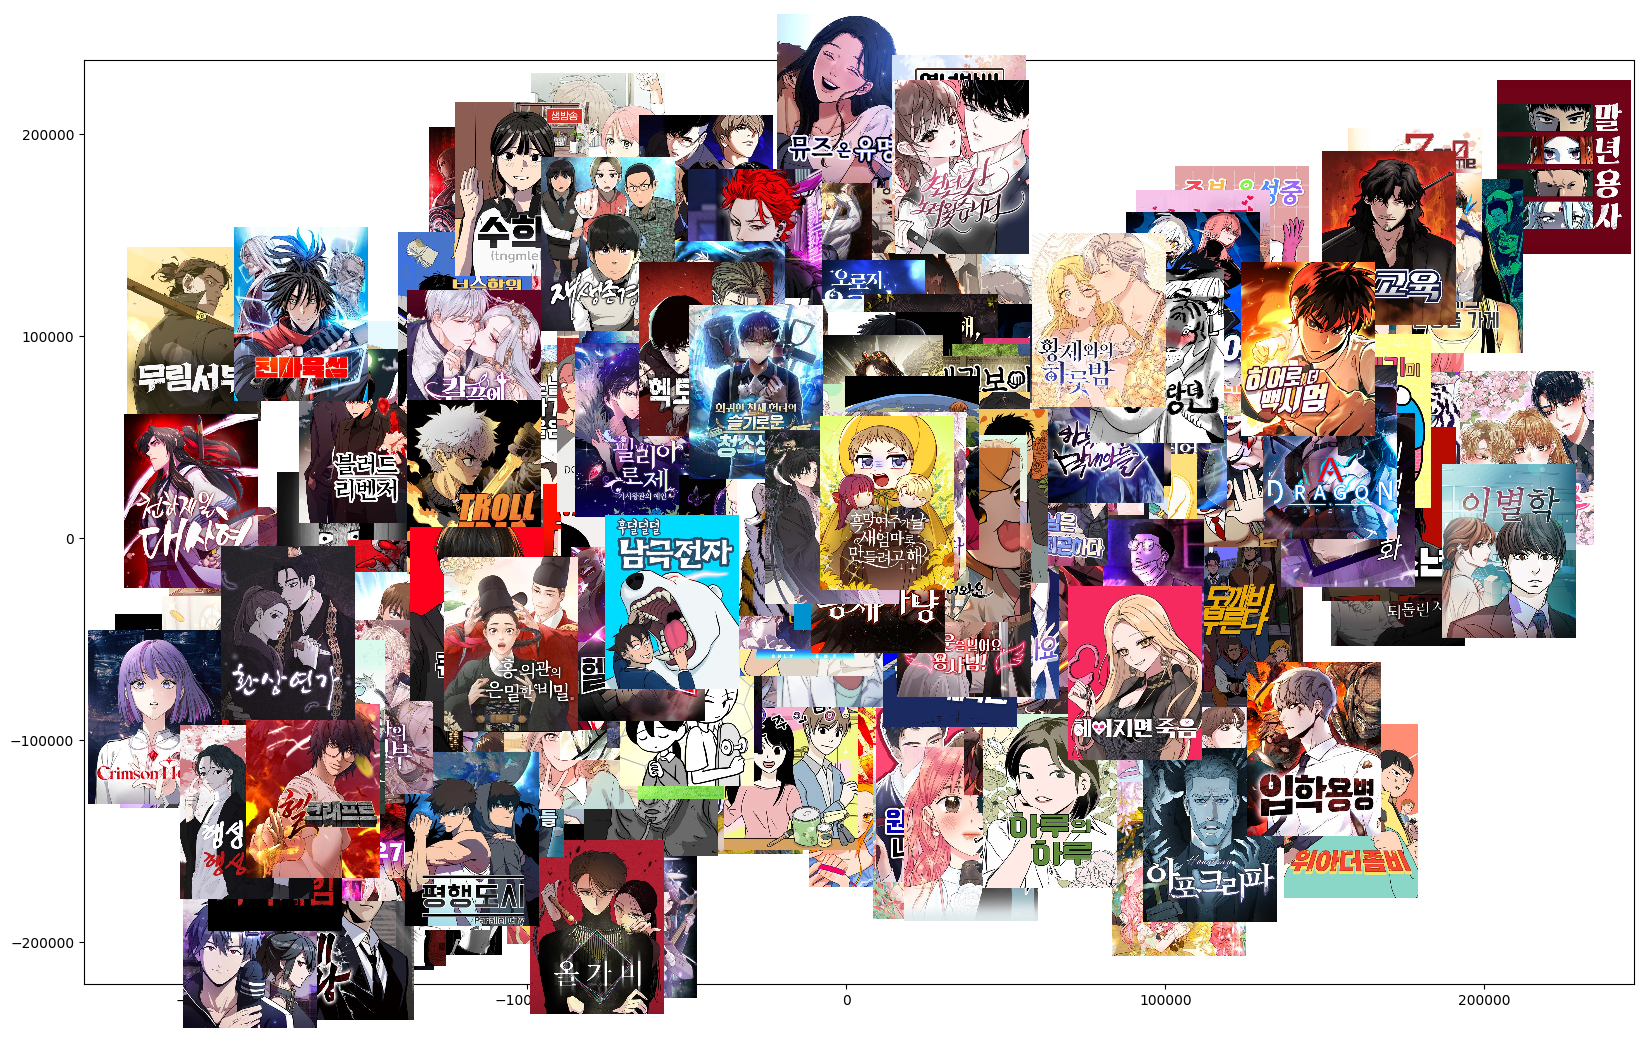

In [3]:

plt.figure(figsize=(20, 12))

for i in range(len(vec_mean_df)):
    img_path = "C:/Users/조영찬/Desktop/스마트인재교육원/thumbnail/"+vec_mean_df['WebToonTitle'][i]+".jpg"
    try:
        imscatter(vec_mean_df['Xmean'][i],vec_mean_df['Ymean'][i], image=img_path,zoom=0.2, show_by_thumnail=True, title=vec_mean_df['WebToonTitle'][i])
    except:
        continue
plt.show()

In [53]:
import math